In [58]:
from sklearn.datasets import make_regression
import numpy as np

In [59]:
X,y = make_regression(n_samples = 4,n_features = 1,n_informative = 1,n_targets = 1,noise = 80,random_state = 13)

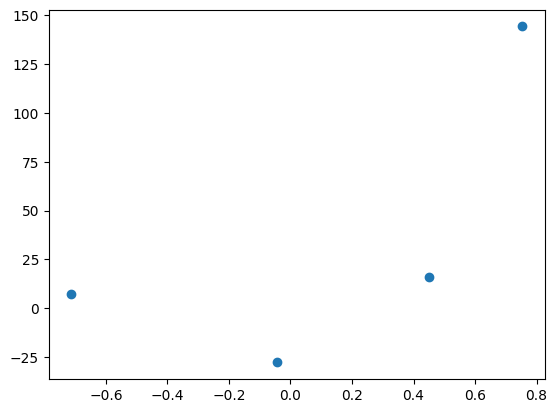

In [60]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [61]:
# Let's apply OLS
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [62]:
reg.coef_

array([78.35063668])

In [63]:
reg.intercept_

np.float64(26.15963284313262)

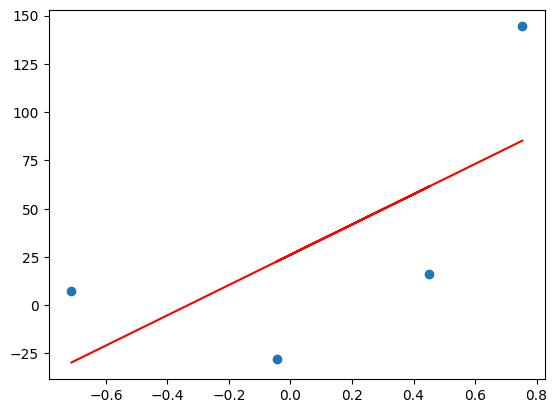

In [64]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color = 'red')

In [65]:
# Let's apply GD assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 0
y_pred = ((78.35*X)+0).reshape(4)

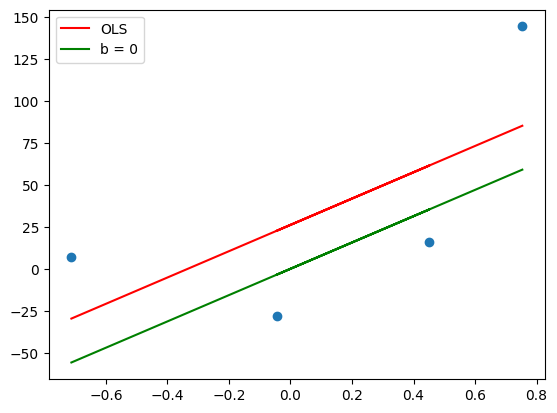

In [66]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color = 'red',label = 'OLS')
plt.plot(X,y_pred,color = 'green',label = 'b = 0')
plt.legend()
plt.show()

In [67]:
m = 78.35
b = 0

loss_slope = -2 * np.sum(y-m*X.ravel()-b)
loss_slope

np.float64(-209.27763408209216)

In [68]:
# Let's take the learning rate = 0.1
lr = 0.1

step_size = lr*loss_slope
step_size

np.float64(-20.927763408209216)

In [69]:
b =  b-step_size

In [70]:
b

np.float64(20.927763408209216)

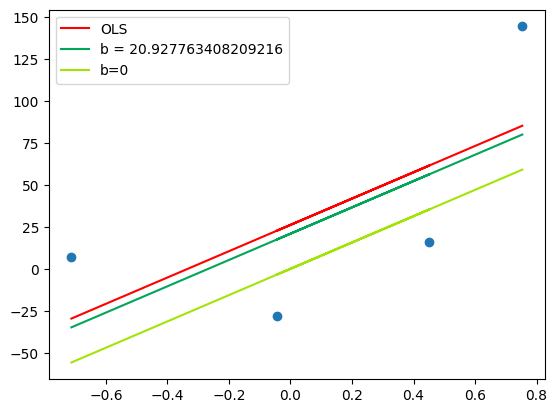

In [71]:
y_pred1 = ((78.35*X) + b).reshape(4)
y_pred1 = ((78.35*X) + b).reshape(4)
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color = 'red',label = 'OLS')
plt.plot(X,y_pred1,color = '#00a65a',label = 'b = {}'.format(b))
plt.plot(X,y_pred,color = '#A3E407',label = 'b=0')
plt.legend()
plt.show()

In [72]:
# Iteration 2
loss_slope = -2*np.sum(y-m*X.ravel()-b)
loss_slope

np.float64(-41.85552681641843)

In [73]:
step_size = loss_slope*lr
step_size

np.float64(-4.185552681641844)

In [74]:
b =  b-step_size

In [75]:
b

np.float64(25.11331608985106)

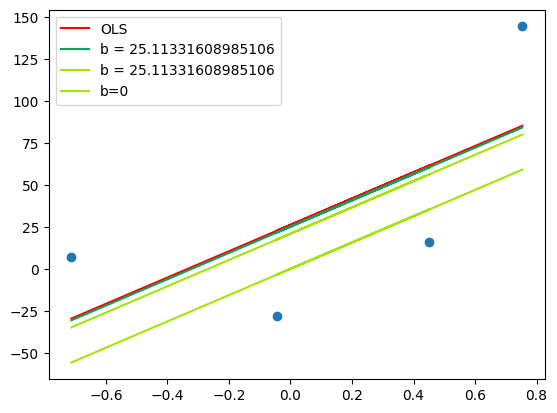

In [76]:
y_pred2 = ((78.35*X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color = 'red',label = 'OLS')
plt.plot(X,y_pred2,color = '#00a65a',label = 'b = {}'.format(b))
plt.plot(X,y_pred1,color = '#A3E407',label = 'b = {}'.format(b))
plt.plot(X,y_pred,color = '#A3E407',label = 'b=0')
plt.legend()
plt.show()

In [77]:
# Iteration 3
loss_slope = -2*np.sum(y-m*X.ravel()-b)
loss_slope

np.float64(-8.371105363283675)

In [78]:
step_size = loss_slope*lr
step_size

np.float64(-0.8371105363283675)

In [79]:
b =  b-step_size

In [80]:
b

np.float64(25.95042662617943)

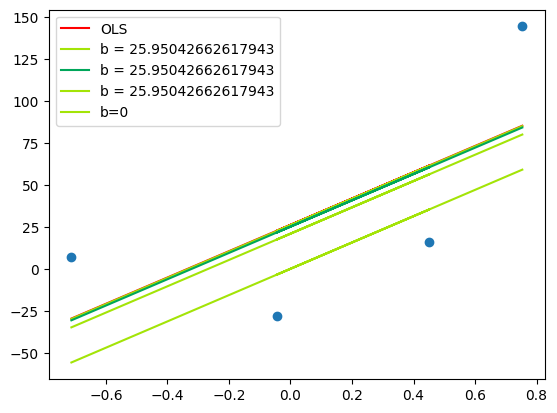

In [81]:
y_pred3 = ((78.35*X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color = 'red',label = 'OLS')
plt.plot(X,y_pred3,color = '#A3E407',label = 'b = {}'.format(b))
plt.plot(X,y_pred2,color = '#00a65a',label = 'b = {}'.format(b))
plt.plot(X,y_pred1,color = '#A3E407',label = 'b = {}'.format(b))
plt.plot(X,y_pred,color = '#A3E407',label = 'b=0')
plt.legend()
plt.show()

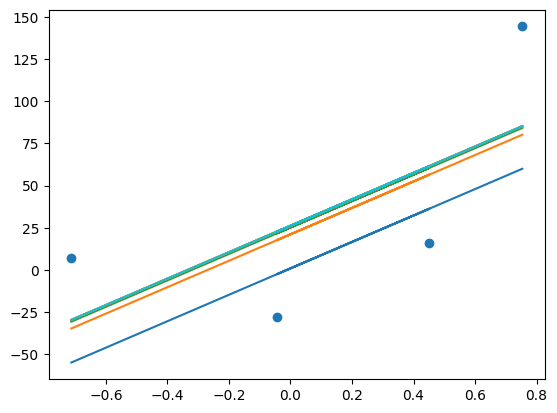

In [82]:
b = -100
m = 78.35
lr = 0.1

epochs = 10


for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.ravel() - b)
  b = b - (lr*loss_slope)
  y_pred = m*X + b
  plt.plot(X,y_pred)
plt.scatter(X,y)

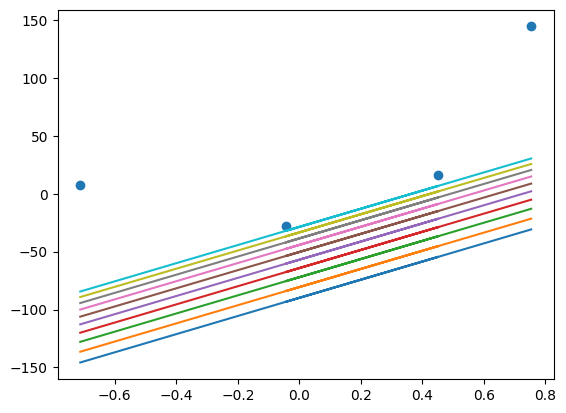

In [83]:
b = -100
m = 78.35
lr = 0.01

epochs = 10


for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.ravel() - b)
  b = b - (lr*loss_slope)
  y_pred = m*X + b
  plt.plot(X,y_pred)
plt.scatter(X,y)

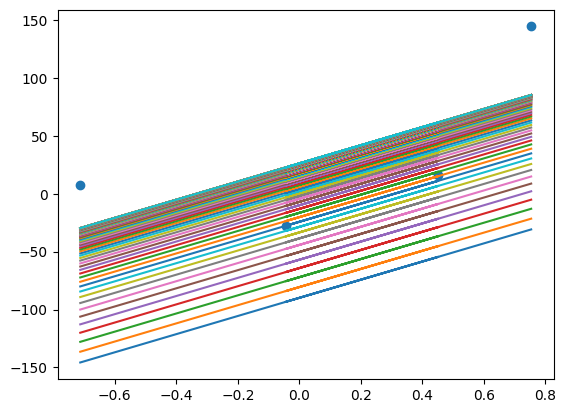

In [84]:
b = -100
m = 78.35
lr = 0.01

epochs = 100


for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.ravel() - b)
  b = b - (lr*loss_slope)
  y_pred = m*X + b
  plt.plot(X,y_pred)
plt.scatter(X,y)

# Making a class GD Regressor
we will create 2 methods
1. Fit
2. Predict

and implement gradient descent ...

step 1.) Logic to calculate intercept only ..

step 2.) Logic to calculate slope....

In [85]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [86]:
X,y = make_regression(n_samples = 100,n_features=1,n_informative = 1,n_targets = 1,noise = 20)

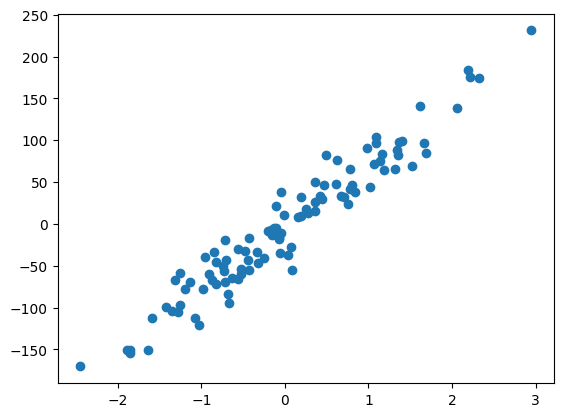

In [87]:
plt.scatter(X,y)

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
lr = LinearRegression()

In [90]:
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[73.21336778]
-4.2318363829024275


In [91]:
m = 35.92

In [92]:
class GDRegressor:
  def __init__(self,learning_rate,epochs):
    self.m = 35.92
    self.b = -120
    self.lr = learning_rate
    self.epochs = epochs
  def fit(self ,X,y):
    # Calculate the b using GD
    for i in range(self.epochs):
      loss_slope = -2 * np.sum(y - self.m*X.ravel() - self.b)
      self.b = self.b - (self.lr*loss_slope)
      print(loss_slope,self.b)
    print(self.b)

In [93]:
gd = GDRegressor(0.01,100)

In [94]:
gd.fit(X,y)

-23377.160697675165 113.77160697675166
23377.160697675165 -120.0
-23377.160697675165 113.77160697675166
23377.160697675165 -120.0
-23377.160697675165 113.77160697675166
23377.160697675165 -120.0
-23377.160697675165 113.77160697675166
23377.160697675165 -120.0
-23377.160697675165 113.77160697675166
23377.160697675165 -120.0
-23377.160697675165 113.77160697675166
23377.160697675165 -120.0
-23377.160697675165 113.77160697675166
23377.160697675165 -120.0
-23377.160697675165 113.77160697675166
23377.160697675165 -120.0
-23377.160697675165 113.77160697675166
23377.160697675165 -120.0
-23377.160697675165 113.77160697675166
23377.160697675165 -120.0
-23377.160697675165 113.77160697675166
23377.160697675165 -120.0
-23377.160697675165 113.77160697675166
23377.160697675165 -120.0
-23377.160697675165 113.77160697675166
23377.160697675165 -120.0
-23377.160697675165 113.77160697675166
23377.160697675165 -120.0
-23377.160697675165 113.77160697675166
23377.160697675165 -120.0
-23377.160697675165 113.7

# GD for 2 variables


In [95]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score


In [96]:
X,y = make_regression(n_samples = 100,n_features=1,n_informative = 1,n_targets=1,noise = 20,random_state = 13)


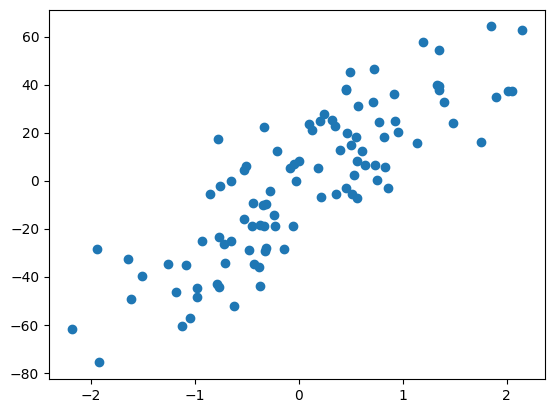

In [97]:
plt.scatter(X,y)

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
lr = LinearRegression()

In [101]:
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [102]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6357827506345679

In [103]:
gd.fit(X_train,y_train)

-18773.478932979426 67.73478932979427
11264.087359787658 -44.90608426808231
-6758.452415872594 22.67843989064363
4055.071449523556 -17.87227460459193
-2433.0428697141333 6.458154092549403
1459.8257218284793 -8.14010312573539
-875.8954330970874 0.6188512052354849
525.5372598582527 -4.636521393347042
-315.3223559149517 -1.4832978341975251
189.193413548971 -3.375231969687235
-113.51604812938255 -2.240071488393409
68.10962887762955 -2.9211677771697047
-40.86577732657773 -2.512510003903927
24.519466395946715 -2.7577046678633943
-14.711679837568 -2.6105878694877145
8.8270079025406 -2.6988579485131203
-5.296204741524235 -2.645895901097878
3.177722844914527 -2.6776731295470233
-1.9066337069488526 -2.658606792477535
1.1439802241693826 -2.6700465947192287
-0.6863881345015486 -2.663182713374213
0.4118328807010059 -2.667301042181223
-0.2470997284206149 -2.664830044897017
0.14825983705235757 -2.6663126432675406
-0.08895590223150407 -2.6654230842452256
0.053373541338842756 -2.665956819658614
-0.0320

In [104]:
np.mean(cross_val_score(lr,X,y,scoring = 'r2',cv = 10))

np.float64(0.6375011587464419)

In [105]:
class GDRegressor:
  def __init__(self,learning_rate,epochs):
    self.m = 100
    self.b = -120
    self.lr = learning_rate
    self.epochs = epochs
  def fit(self ,X,y):
    # Calculate the b using GD
    for i in range(self.epochs):
      loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
      loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
      self.b = self.b - (self.lr*loss_slope_b)
      self.m = self.m - (self.lr*loss_slope_m)
      #print(loss_slope,self.b)
    print(self.m,self.b)
  def predict(self,X):
    return self.m*X + self.b


In [106]:
gd = GDRegressor(0.001,100)

In [107]:
gd.fit(X,y)

27.828091872608653 -2.2947448944994893


In [108]:
gd.predict(X)

array([[-22.11921769],
       [-14.45967436],
       [-14.92180785],
       [ 24.22071289],
       [  4.32438488],
       [ 21.67112435],
       [ -9.06605019],
       [  2.851948  ],
       [-22.35879005],
       [-14.25796038],
       [ 53.78500537],
       [  8.75972323],
       [  3.48793408],
       [ -8.76271341],
       [-23.68416824],
       [ 10.31579463],
       [ 15.5120051 ],
       [  7.71035286],
       [-47.24011768],
       [ 46.38331635],
       [-24.25080397],
       [-16.54175657],
       [-28.12854285],
       [ 57.54630988],
       [ -8.06489135],
       [-47.90758693],
       [-11.71784478],
       [-11.25883162],
       [-15.69039288],
       [-16.85340673],
       [ 17.79616505],
       [ 19.01909815],
       [ 10.32476716],
       [-37.40283105],
       [-63.15798965],
       [-35.28268842],
       [  3.75651986],
       [ 34.72543668],
       [-32.54893408],
       [ 13.35192552],
       [-44.39433775],
       [ -2.36122692],
       [-10.03469777],
       [ 10

In [109]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6357827475296629